In [379]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

In [380]:
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])
realwage

Game            Game0                                                Game1  \
Player              b                          w                         b   
Statistics Evaluation     HR TimeUsed Evaluation    HR TimeUsed Evaluation   
Time                                                                         
0               -0.38  107.0      0.0       0.38  88.0      0.0      -0.38   
1               -0.49  107.0      0.0       0.49  88.0      0.0      -0.49   
2               -0.49  107.0      0.0       0.49  89.0      0.0      -0.49   
3               -0.49  107.0      0.0       0.49  89.0      0.0      -0.49   
4               -0.49  107.0      0.0       0.49  90.0      0.0      -0.49   
...               ...    ...      ...        ...   ...      ...        ...   
1185              NaN    NaN      NaN        NaN   NaN      NaN        NaN   
1186              NaN    NaN      NaN        NaN   NaN      NaN        NaN   
1187              NaN    NaN      NaN        NaN   NaN      NaN        NaN   
1188              NaN    NaN      NaN        NaN   NaN      NaN        NaN   
1189              NaN    NaN      NaN        NaN   NaN      NaN        NaN   

Game                                  ...    Game6                            \
Player                             w  ...        b          w                  
Statistics    HR TimeUsed Evaluation  ... TimeUsed Evaluation    HR TimeUsed   
Time                                  ...                                      
0           86.0      0.0       0.38  ...      0.0       0.38  97.0      0.0   
1           87.0      0.0       0.49  ...      0.0       0.42  97.0      0.0   
2           87.0      0.0       0.49  ...      0.0       0.42  97.0      0.0   
3           88.0      0.0       0.49  ...      0.0       0.23  96.0      2.0   
4           89.0      0.0       0.49  ...      0.0       0.23  97.0      2.0   
...          ...      ...        ...  ...      ...        ...   ...      ...   
1185         NaN      NaN        NaN  ...      NaN        NaN   NaN      NaN   
1186         NaN      NaN        NaN  ...      NaN        NaN   NaN      NaN   
1187         NaN      NaN        NaN  ...      NaN        NaN   NaN      NaN   
1188         NaN      NaN        NaN  ...      NaN        NaN   NaN      NaN   
1189         NaN      NaN        NaN  ...      NaN        NaN   NaN      NaN   

Game            Game7                                           
Player              b                         w                 
Statistics Evaluation    HR TimeUsed Evaluation    HR TimeUsed  
Time                                                            
0               -0.40  65.0      0.0       0.40  71.0      0.0  
1               -0.40  65.0      0.0       0.40  71.0      0.0  
2               -0.40  66.0      0.0       0.40  72.0      0.0  
3               -0.40  66.0      0.0       0.40  72.0      0.0  
4               -0.45  67.0      0.0       0.45  73.0      3.0  
...               ...   ...      ...        ...   ...      ...  
1185              NaN   NaN      NaN        NaN   NaN      NaN  
1186              NaN   NaN      NaN        NaN   NaN      NaN  
1187              NaN   NaN      NaN        NaN   NaN      NaN  
1188              NaN   NaN      NaN        NaN   NaN      NaN  
1189              NaN   NaN      NaN        NaN   NaN      NaN  

[1190 rows x 48 columns]

In [381]:
def heart_rate_delta(dataframe, color):
    df = dataframe.iloc[:10]
    return np.sum(df['Game0'][color]['HR'])//10

## Analisi bivariata con due variabili quantitative

<AxesSubplot:xlabel='HR', ylabel='Evaluation'>

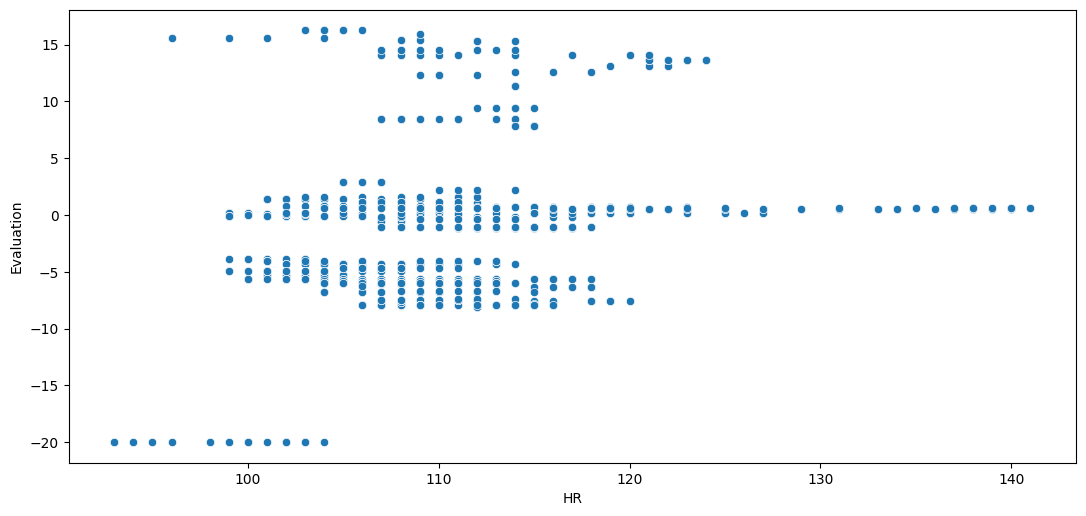

In [382]:
#diagramma a dispersione
sns.scatterplot(x=realwage['Game0']['b']['HR'], y=realwage['Game0']['b']['Evaluation'], data=realwage)


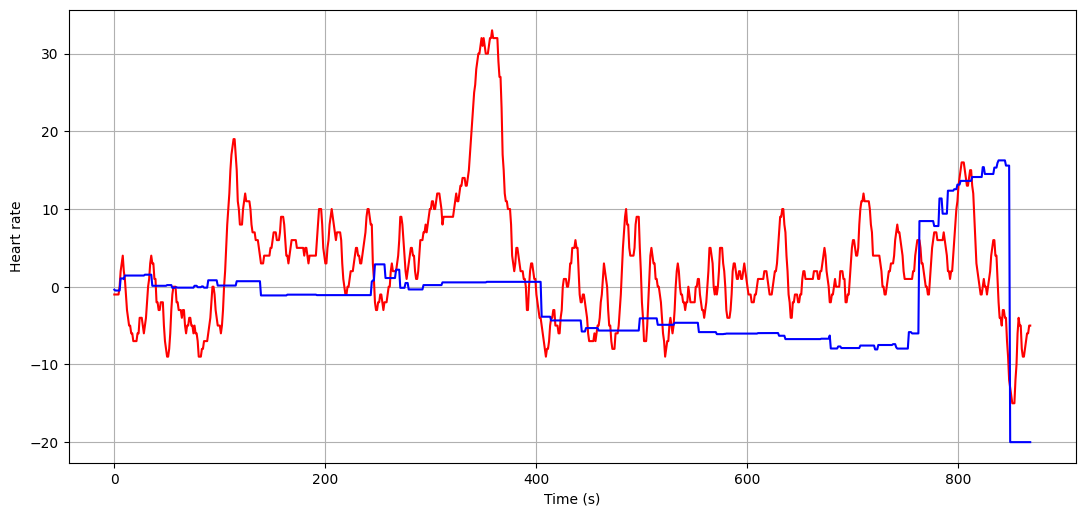

In [383]:
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])

plt.rcParams["figure.figsize"] = (13,6)
hb = realwage['Game0']['b']['HR'] - heart_rate_delta(realwage,'b')

t = realwage.index
eb = realwage['Game0']['b']['Evaluation']
plt.grid()
plt.plot(t,hb, 'r')
plt.plot(t,eb,'b')
plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()


<AxesSubplot:>

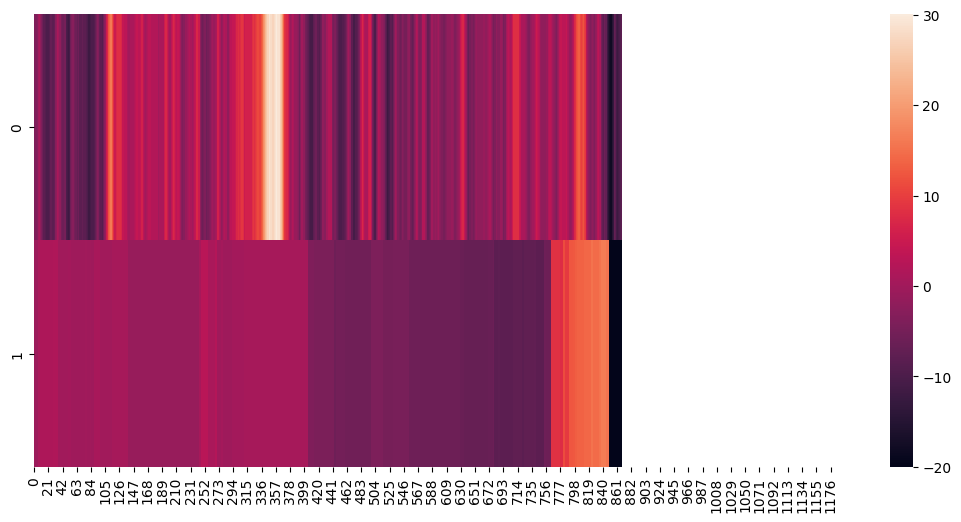

In [384]:
#heatmap or correlation matrix

hrw = realwage['Game0']['b']['HR'] - realwage['Game0']['b']['HR'].mean()
evw=realwage['Game0']['b']['Evaluation']
df = np.array([hrw,evw])
sns.heatmap(df)


In [385]:
df1 = pd.DataFrame({'x1':t,
                   'x2': hb,
                   'x3': eb})
df1.corr()


,x1,x2,x3
x1,1.000000,-0.054136,-0.096352
x2,-0.054136,1.000000,0.246959
x3,-0.096352,0.246959,1.000000


Game                         Game0                                           \
Player                           b                              w             
Statistics              Evaluation        HR  TimeUsed Evaluation        HR   
Game  Player Statistics                                                       
Game0 b      Evaluation   1.000000  0.246959 -0.092012  -1.000000  0.095384   
             HR           0.246959  1.000000 -0.092534  -0.246959 -0.141853   
             TimeUsed    -0.092012 -0.092534  1.000000   0.092012 -0.287662   
      w      Evaluation  -1.000000 -0.246959  0.092012   1.000000 -0.095384   
             HR           0.095384 -0.141853 -0.287662  -0.095384  1.000000   
             TimeUsed    -0.095099 -0.034846  0.979524   0.095099 -0.268465   
Game1 b      Evaluation  -0.031461 -0.106224 -0.813449   0.031461  0.327007   
             HR          -0.339675  0.020782  0.355400   0.339675 -0.199807   
             TimeUsed    -0.290945  0.034513  0.979690   0.290945 -0.238243   
      w      Evaluation   0.031461  0.106224  0.813449  -0.031461 -0.327007   
             HR           0.163892 -0.257900  0.330434  -0.163892  0.037634   
             TimeUsed    -0.232585 -0.023942  0.987353   0.232585 -0.210640   
Game2 b      Evaluation   0.012329  0.003954 -0.881493  -0.012329  0.117742   
             HR          -0.060424  0.078911  0.744558   0.060424  0.000714   
             TimeUsed    -0.148762  0.064421  0.988671   0.148762 -0.246441   
      w      Evaluation  -0.012329 -0.003954  0.881493   0.012329 -0.117742   
             HR          -0.042571 -0.156643  0.014686   0.042571  0.192465   
             TimeUsed    -0.143224  0.019020  0.978960   0.143224 -0.227115   
Game3 b      Evaluation  -0.214895 -0.027221  0.680659   0.214895 -0.300757   
             HR          -0.136423 -0.048350  0.351033   0.136423 -0.120168   
             TimeUsed    -0.126795 -0.077269  0.986634   0.126795 -0.259582   
      w      Evaluation   0.214895  0.027221 -0.680659  -0.214895  0.300757   
             HR          -0.030377  0.148387 -0.127775   0.030377  0.015696   
             TimeUsed    -0.079122 -0.050114  0.991715   0.079122 -0.314248   
Game4 b      Evaluation   0.028059 -0.239185 -0.708510  -0.028059  0.227151   
             HR          -0.151815  0.395762 -0.001091   0.151815 -0.134953   
             TimeUsed    -0.167154 -0.012961  0.955535   0.167154 -0.287794   
      w      Evaluation  -0.028059  0.239185  0.708510   0.028059 -0.227151   
             HR          -0.195827 -0.099945  0.358082   0.195827  0.084766   
             TimeUsed    -0.123857 -0.063666  0.987312   0.123857 -0.283734   
Game5 b      Evaluation   0.574420  0.266961 -0.178475  -0.574420 -0.140345   
             HR          -0.241049 -0.234692 -0.226417   0.241049  0.253033   
             TimeUsed    -0.505506  0.163851  0.968739   0.505506 -0.129033   
      w      Evaluation  -0.574420 -0.266961  0.178475   0.574420  0.140345   
             HR          -0.077755  0.320171  0.303327   0.077755 -0.172738   
             TimeUsed    -0.501861  0.248172  0.957378   0.501861 -0.240307   
Game6 b      Evaluation  -0.114166  0.105011 -0.674535   0.114166  0.271920   
             HR           0.018740  0.436380 -0.006232  -0.018740 -0.445881   
             TimeUsed    -0.107323 -0.104679  0.994978   0.107323 -0.278243   
      w      Evaluation   0.114166 -0.105011  0.674535  -0.114166 -0.271920   
             HR           0.087781  0.191193  0.088549  -0.087781  0.066449   
             TimeUsed    -0.062176 -0.018169  0.980057   0.062176 -0.274023   
Game7 b      Evaluation   0.520736 -0.046155 -0.741442  -0.520736  0.144703   
             HR          -0.111786  0.090958  0.333026   0.111786  0.209326   
             TimeUsed    -0.466341  0.268429  0.961715   0.466341 -0.263102   
      w      Evaluation  -0.520736  0.046155  0.741442   0.520736 -0.144703   
             HR          -0.447965 -0.168903  0.65

## Multivariate Normality Test
Used to determine whether a set of multivariate observations could have come from a multivariate normal distribution.A multivariate normal distribution for m variables is characterized by m means, m variances and $ \frac{m(m-1)}{2} $ covariances or correlations and the marginal distribution of each variable is normal.

- $ H_0 $: the variables come from a Multivariate Normal Distribution
- $ H_A $: the variables don't come from a Multivariate Normal Distribution

### Henze-Zirkler Multivariate Normality Test

In [387]:
from pingouin import multivariate_normality

#create a dataset with three variables x1, x2, and x3
df = pd.DataFrame({'x1':t,
                   'x2': hb,
                   'x3': eb})

#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(df, alpha=.05)



HZResults(hz=49.1092887145985, pval=1.1679406676440586e-169, normal=False)

Since in the above example, the p-value is 1.2e-130 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a multivariate normal distribution.

In [388]:
test_stat_normality, p_value_normality=stats.shapiro(df)
p_value_normality

1.0

check variance homogeneity

In [389]:
test_stat_var, p_value_var= stats.levene(hb,eb)
p_value_var

nan

We reject the null hypothesis, the variances of the samples ar not the same